# **Exploratory Data Analysis (EDA)**

## Objectives

* Explore the dataset
* Visualise the dataset with charts
* Investigate hypotheses

## Inputs

* Cleaned dataset 

## Outputs

* Charts and visuals


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir


'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance'

# Overview of the Data

## Hypotheses

- Hypothesis 1: **Average internal test score** is more strongly correlated with final exam marks than **attendance**.

- Hypothesis 2: **Average internal test scores** explain more variance in final exam marks than engagement based behaviours, such as **attendance**, **assignment score**, and **daily study hours**.

- Hypothesis 3: Students studying for more than 3 hours per day have significantly higher **final exam marks** than those who study 3 hours or fewer.

- Hypothesis 4: A regression model that includes preprocessing steps (such as scaling) will perform better than a model trained on the raw data.

In [4]:
#import libraries for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

Read the cleaned dataset into a pandas dataframe

In [5]:
#read cleaned dataset into dataframe
df = pd.read_csv('data/academic_performance_cleaned.csv')
#view first 10 rows
df.head(10)

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score,Study Group
0,84,30,36,7,3,72,33.0,low
1,91,24,38,6,3,56,31.0,low
2,73,29,26,7,3,56,27.5,low
3,80,36,35,7,3,74,35.5,low
4,84,31,37,8,3,66,34.0,low
5,100,34,34,7,3,79,34.0,low
6,96,40,36,8,3,83,38.0,low
7,83,39,37,7,3,77,38.0,low
8,91,30,37,8,2,71,33.5,low
9,87,27,37,8,3,61,32.0,low


A reminder of the basic information, including data types. When the cleaned CSV is saved and read into this new notebook the data types revert back to int64, so I will convert them to int8 again. This is not absolutely necessary with this project as the dataset is not too large, but this may be a useful step with a very large dataset to save memory and time.
I will also convert the study group datatype from object to category. 

In [6]:
#show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attendance (%)                 2000 non-null   int64  
 1   Internal Test 1 (out of 40)    2000 non-null   int64  
 2   Internal Test 2 (out of 40)    2000 non-null   int64  
 3   Assignment Score (out of 10)   2000 non-null   int64  
 4   Daily Study Hours              2000 non-null   int64  
 5   Final Exam Marks (out of 100)  2000 non-null   int64  
 6   Average Test Score             2000 non-null   float64
 7   Study Group                    2000 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 125.1+ KB


In [7]:
#loop through columns with int64 and change the datatype to int8
df = df.astype({col: 'int8' for col in df.select_dtypes('int64').columns})

#loop through them and convert datatypes to category
df = df.astype({col: 'category' for col in df.select_dtypes('object').columns})
#display datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attendance (%)                 2000 non-null   int8    
 1   Internal Test 1 (out of 40)    2000 non-null   int8    
 2   Internal Test 2 (out of 40)    2000 non-null   int8    
 3   Assignment Score (out of 10)   2000 non-null   int8    
 4   Daily Study Hours              2000 non-null   int8    
 5   Final Exam Marks (out of 100)  2000 non-null   int8    
 6   Average Test Score             2000 non-null   float64 
 7   Study Group                    2000 non-null   category
dtypes: category(1), float64(1), int8(6)
memory usage: 29.5 KB


A reminder of the summary statistics. Values are realistic, not too high or low.

In [8]:
#summary statistics
df.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000,32.29000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265,3.61091
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000,19.50000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000,30.00000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000,32.50000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000,35.00000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000,40.00000


# Data Distribution

I will investigate the distribution of the numerical columns in this dataset using histograms. 

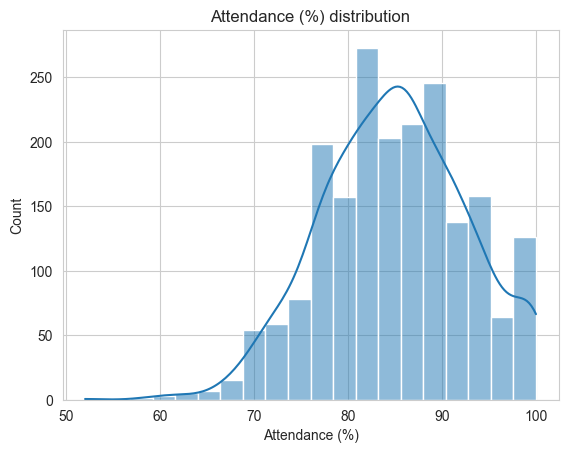

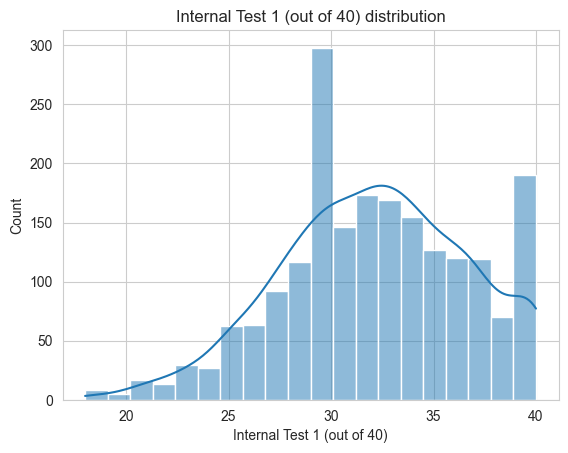

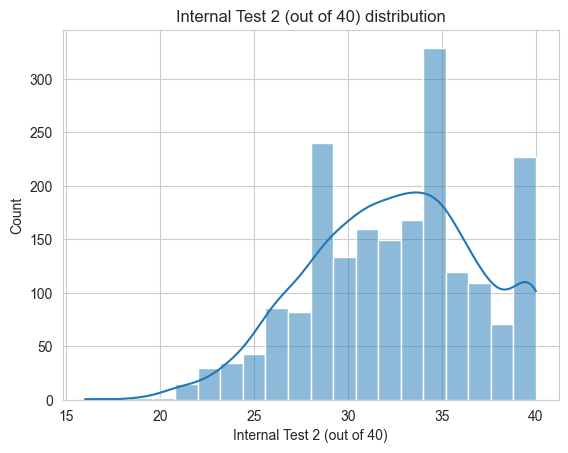

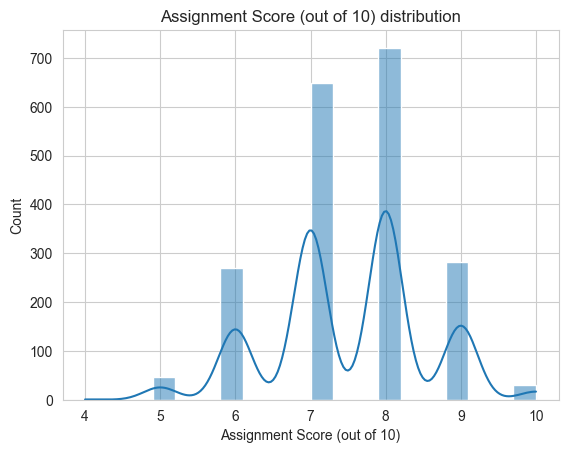

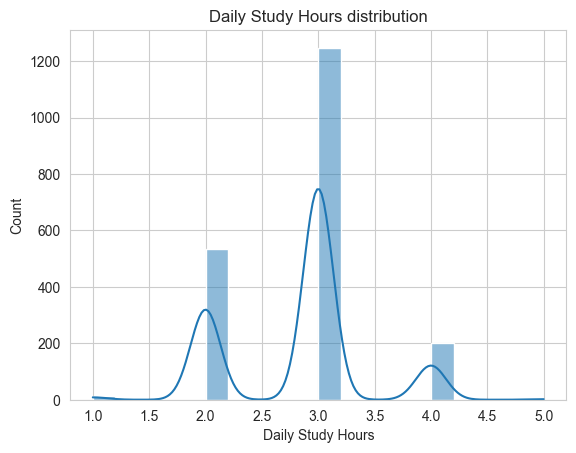

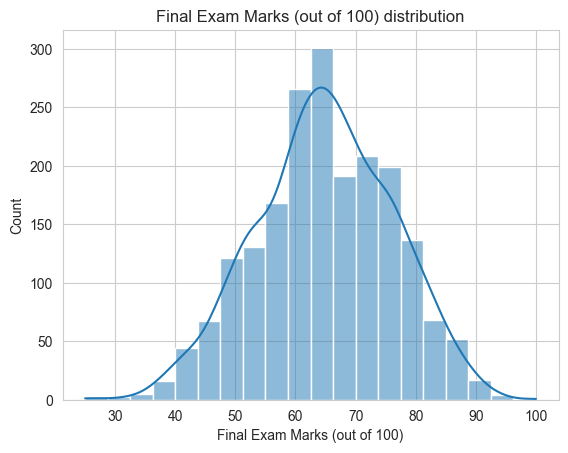

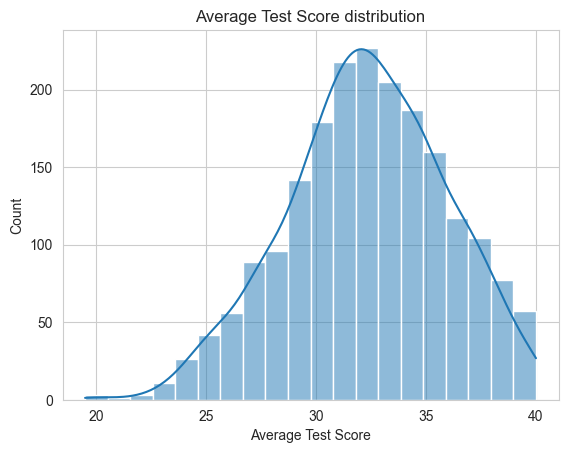

In [9]:
#store numerical column names in a list called num_cols
num_cols = df.select_dtypes(['int8','float64']).columns

#loop over the columns and plot a historgram for each
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'{col} distribution')
    plt.show()



Visually these distributions look skewed rather than normal. Their normality will effect what statistical tests that can be performed on them.

The skewness of the data can be assessed using .skew

In [10]:
#assess skewness
df[num_cols].skew().round(3)

Attendance (%)                  -0.135
Internal Test 1 (out of 40)     -0.229
Internal Test 2 (out of 40)     -0.211
Assignment Score (out of 10)    -0.132
Daily Study Hours               -0.035
Final Exam Marks (out of 100)   -0.119
Average Test Score              -0.193
dtype: float64

The shape of the distributions indicated that they were negatively skewed. This means that on average more people have high attendence and high scores in their internal tests.

A normal distribution (symetric) will have a skew of 0. The negative skew of these data is confirmed by the above values. 

The skew values are not considered to be large:
- Attendance = **-0.135**
- Internal test results = **-0.229** and **-0.211**

They are within the range of what can be considered to be approximately normal, meaning that the results are appropriate for Pearson correlation and parametric statistical tests. 
The Final exam marks are less skewed (more normally distributed). There is also less skew in the average test scores compared with the original values. 

# Pairplot 

A pairplot is a useful way to get a quick understanding and overview of the dataset. I have coloured by study group to see if there is a discernable difference betwen pupils that studied for a long time and those that did not. 
I am going to leave out the internal assessment scores, using only the average test scores, I am also going to leave out the daily study hours as this is captured by the colour difference

In [13]:
#get the column names to help me make my list of columns I am interested in
df.columns.unique()

Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score', 'Study Group'],
      dtype='object')

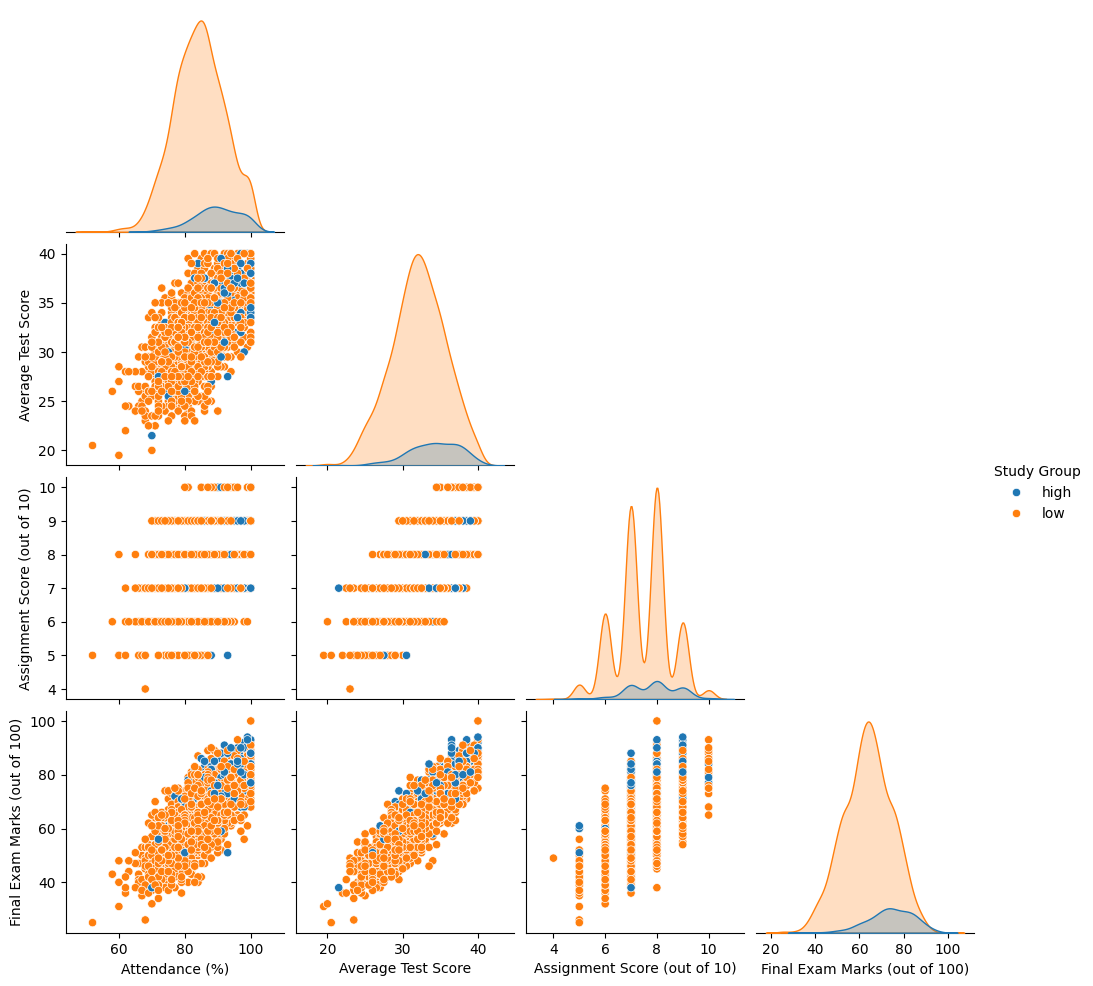

In [14]:
#list of the columns I am interested in
pair_cols = ['Attendance (%)', 'Average Test Score', 
             'Assignment Score (out of 10)', 'Final Exam Marks (out of 100)', 
             'Study Group']
#pair plot to show relationships between variables
sns.pairplot(df[pair_cols], hue='Study Group', corner=True, )
plt.show()

You can see from the pairplot that as attendance, average test score and assignment scores increase that the final exam scores increase.
It seems that, though this is not always the case, the high study group have higher final marks, as well as possibly higher attendance and higher test grades. I will be investigating this further in the analysis of my hypotheses. 

# Hypothesis Testing

### **Hypothesis 1**: Average internal test score is more strongly correlated with final exam mark than attendance.

In order to validate this hypothesis I will:

- plot internal test score and attendance against final exam marks on two separate graphs. 

- perform a Pearson correlation analysis and plot the results on a correlation heatmap.

- compare the correlation scores for the two parameters in question. 

First I need to import plotly so I can make interactive charts

In [15]:
import plotly.express as px
import plotly.io as pio

for col in ['Average Test Score', 'Attendance (%)']:
    fig = px.scatter(df, x=col, y='Final Exam Marks (out of 100)', trendline='ols', title=(f'{col} against Final Exam Marks'))
    fig.show()

These scatter plot suggest that there is a positive relationship between both parameters and final exam results. To determine which variable has the stronger linear correlation, we can calculate the Pearson correlation coefficients and visualise them in a correlation heatmap.

In [16]:
# get unique columns 
df.columns.unique()

Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score', 'Study Group'],
      dtype='object')

In [17]:
#Select the columns that I want assess correlation
corr_cols = ['Attendance (%)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score']
#calculate pearson correlation coefficient for these columns
df_corr = df[corr_cols].corr(method='pearson')
#display results
df_corr.round(3)

,Attendance (%),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
Attendance (%),1.000,0.432,0.299,0.726,0.629
Assignment Score (out of 10),0.432,1.000,0.169,0.669,0.698
Daily Study Hours,0.299,0.169,1.000,0.413,0.276
Final Exam Marks (out of 100),0.726,0.669,0.413,1.000,0.868
Average Test Score,0.629,0.698,0.276,0.868,1.000


These correlation coefficients show us how correlated different parameters are. The closer to 1 the more directly correlated. The size of these numbers is useful but hard to interpret. A correlation heatmap makes the relationships easier to visualise.

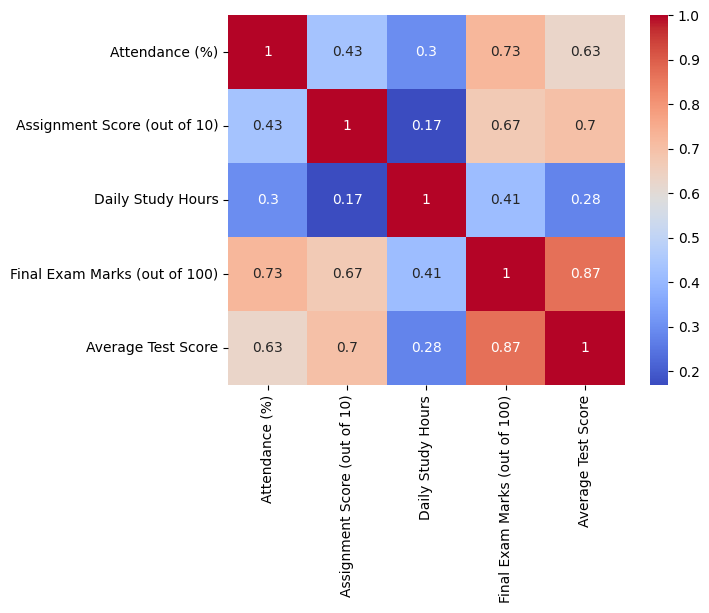

In [18]:
#correlation heatmap
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.show()

It is possible to remove the other side and make the heatmap clearer by using a mask. The following code is copied from the code institute LMS

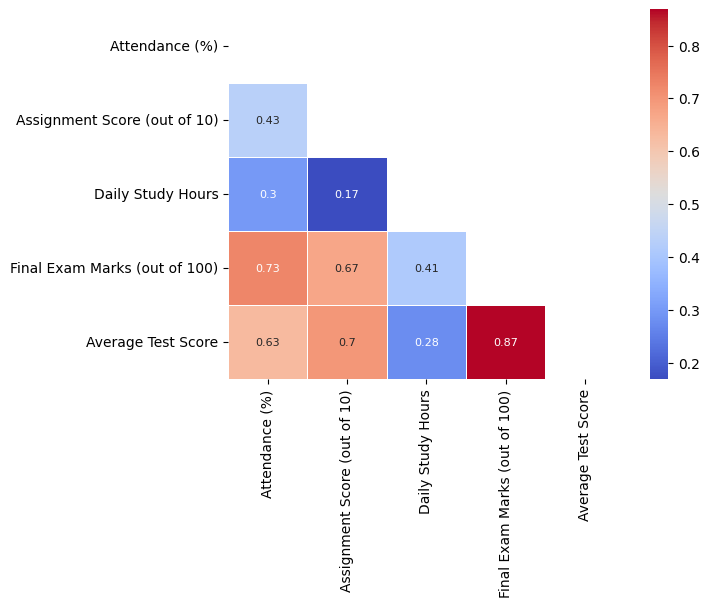

In [19]:
# code copied from LMS to remove duplicated side
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='coolwarm',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()


To summarise the correlation heatmap I will list the factors from most to least correlated with final exam marks with their coefficients. The closer to 1 the more correlated:

- Average test score  0.87
- Attendance          0.73
- Assignment score    0.67
- Daily study hours   0.41

#### H1 Conclusion

**Hypothesis 1**: Average internal test score is more strongly correlated with final exam mark than attendance.

This correlation heatmap suggests that both attendance and average test scores are both highly correlated with final exam marks.

The pearson coefficient value for correlation beetween average test score and final exam results is 0.87, whereas the correlation between attendance and final exam marks was 0.73. 
This correlation heatmap suggests strong prior academic performance in a stronger predictor of final outcomes than their attendance. 

# Hypothesis 2

### **Hypothesis 2:** Average internal test scores (prior academic performance) explain more variance in final exam marks than engagement based behaviours, such as attendance, assignment score, and daily study hours.

The heatmap from hypothesis 1 gives preliminary support for the hypothesis. Prior performance appears to be a stronger predictor of final exam success than engagement based measures (attendance, assignment score, and study hours). I will confirm this quantitatively through a regression analysis. which will be conducted in the machine learning notebook. 

# Hypothesis 3

### **Hypothesis 3:** Students studying more than 3 hours score significantly higher than those below the threshold.

This hypothesis examines whether pupils who do more revision perform better. 
To test this the dataset has been split into two groups:

- **Low study group** <= 3 hours of study 
- **High study group** > 3 hours of study  

The goal is to determine whether there is a statistically significant difference in final exam marks between these groups. A significant difference would support the hypothesis that studying for more than 3 hours is associated with improved academic performance. 

I will use appropriate statistical testing (e.g., an independent samples t-test or Mann-Whitney U test depending on distribution normality) to determine whether the difference between the groups is meaningful. I will also support this analysis with visualisation (e.g., boxplots or violin plots) to compare score distributions.

In this case the **null hypothesis** is that there is no significant difference between the final test marks of the high study group and the low study group.

For ease drop all of the columns in the dataframe apart from final test results and study group

In [20]:
#unique values
df.columns.unique()

Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score', 'Study Group'],
      dtype='object')

In [ ]:
#drop all columns apart from final exam marks and study group
df_study_group = df.drop(columns=['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours','Average Test Score'])
#display stuy group
df_study_group

,Final Exam Marks (out of 100),Study Group
0,72,low
1,56,low
2,56,low
3,74,low
4,66,low
...,...,...
1995,52,low
1996,57,low
1997,61,low
1998,59,low


I can compare the two groups by looking at the descriptive statistics after I groupby study group

In [39]:
# groupby study group then get descriptive statistics
df_study_group.groupby('Study Group').describe().round(3).T

C:\Users\tb975\AppData\Local\Temp\ipykernel_756\667396583.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Study Group                             high       low
Final Exam Marks (out of 100) count  205.000  1795.000
                              mean    74.107    63.798
                              std     10.012    11.001
                              min     38.000    25.000
                              25%     68.000    56.000
                              50%     74.000    64.000
                              75%     82.000    71.000
                              max     94.000   100.000

This table indicates that the mean for the high study group is higher than the low study group, the standard deviations are very similar, and the lowest value for the high study group is higher than the low study group.

How similar are their distributions? I can assess this with a histplot

In [65]:
df_pivot = pd.pivot(df_study_group, columns='Study Group', values='Final Exam Marks (out of 100)')
df_pivot

Study Group,high,low
0,NaN,72.0
1,NaN,56.0
2,NaN,56.0
3,NaN,74.0
4,NaN,66.0
...,...,...
1995,NaN,52.0
1996,NaN,57.0
1997,NaN,61.0
1998,NaN,59.0


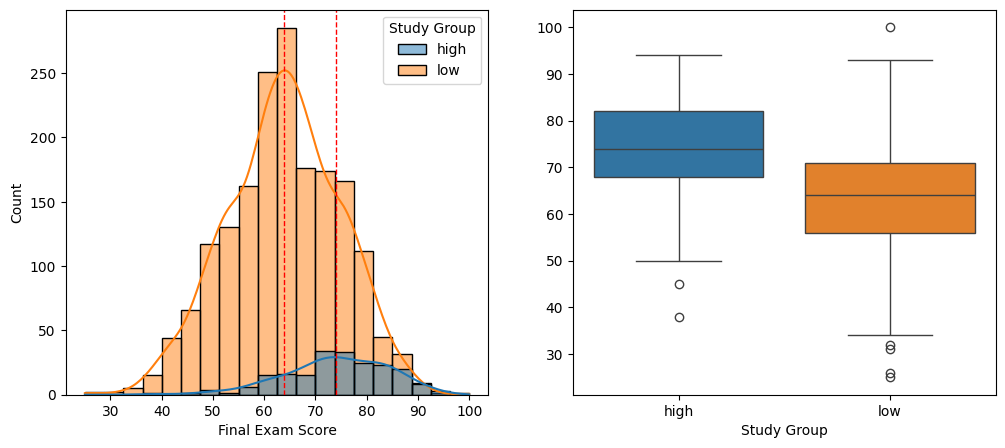

In [ ]:
#Credit to LMS
fig, axes = plt.subplots(nrows=1 ,ncols=2 ,figsize=(12,5))
sns.histplot(data=df_pivot, kde=True, bins=20, ax=axes[0], )
for col in df_pivot.columns: 
  axes[0].axvline(df_pivot[col].mean(), color='r', linestyle='dashed', linewidth=1)
sns.boxplot(data=df_pivot, ax=axes[1])
axes[0].set(xlabel='Final Exam Score')
plt.show()

# BLAH BLAH BLAH summarise histplot

### Normality test

first assess normality

In [74]:
import pingouin as pg
import scipy

pg.normality(df_study_group, dv='Final Exam Marks (out of 100)', group='Study Group', alpha=0.05)


,W,pval,normal
Study Group,,,
low,0.996863,0.001036,False
high,0.979683,0.004605,False


Not normal so mann-whitney u test

In [81]:
pg.mwu(x=df_pivot['high'], y=df_pivot['low'])

,U-val,alternative,p-val,RBC,CLES
MWU,278984.5,two-sided,7.170064e-34,0.516323,0.758162


Tiny p val, definitely different

# H1 check if the df is normal Spoiler: it isn't

In [75]:
pg.normality(df[num_cols], alpha=0.05)

,W,pval,normal
Attendance (%),0.990549,3.936626e-10,False
Internal Test 1 (out of 40),0.981489,1.958821e-15,False
Internal Test 2 (out of 40),0.978298,7.157019e-17,False
Assignment Score (out of 10),0.917761,1.134206e-31,False
Daily Study Hours,0.775305,4.099864e-46,False
Final Exam Marks (out of 100),0.996641,2.190908e-04,False
Average Test Score,0.992659,1.847653e-08,False


“Visual inspection suggested the variables were approximately symmetric, however formal Shapiro–Wilk testing indicated statistically significant departures from normality. Therefore, non-parametric or robust statistical methods may be more appropriate.”
"Because the Shapiro–Wilk test indicated that the distribution of scores was significantly non-normal (p < .05), a Mann-Whitney U test was used instead of an independent samples t-test to compare final exam performance between high and low study groups."

“Initial inspection of distributions suggested approximate symmetry, and Pearson correlation was calculated. However, formal Shapiro–Wilk normality testing later indicated significant deviations from normality. Therefore, Spearman’s rank correlation was computed as a more appropriate non-parametric alternative.”

In [76]:
df_corr_spear = df[corr_cols].corr(method='spearman')
#display results
df_corr_spear.round(3)

,Attendance (%),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
Attendance (%),1.000,0.424,0.278,0.712,0.616
Assignment Score (out of 10),0.424,1.000,0.157,0.656,0.686
Daily Study Hours,0.278,0.157,1.000,0.393,0.266
Final Exam Marks (out of 100),0.712,0.656,0.393,1.000,0.862
Average Test Score,0.616,0.686,0.266,0.862,1.000


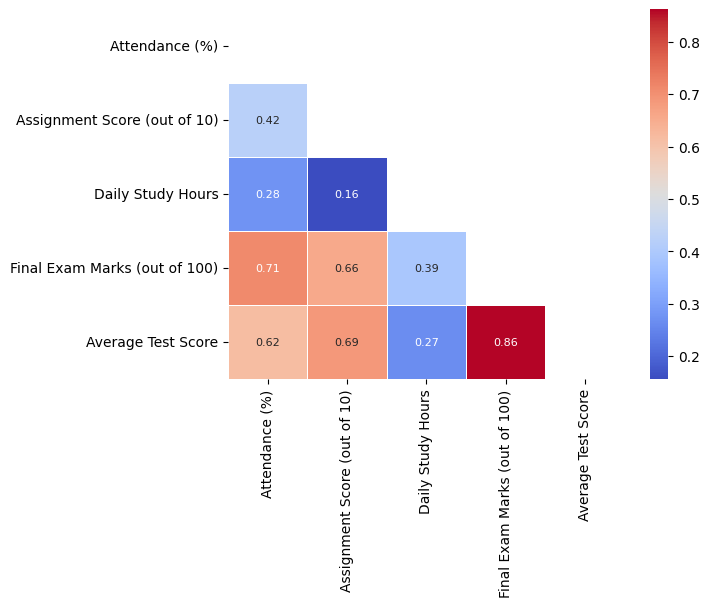

In [78]:
# code copied from LMS to remove duplicated side
mask = np.zeros_like(df_corr_spear)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr_spear,annot=True,mask=mask,cmap='coolwarm',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr_spear.shape[1],0);
plt.show()

This shows the exact same pattern but with slightly different numbers 

---

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.